<a href="https://colab.research.google.com/github/JJET25/ML-Movie-Rating-Prediction/blob/main/Equipo2_ModeloRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split as split

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/MCD/solo valores numericos exel.xlsx")
data.head()

,Año,Duracion,Criticos,Audiencia,Miguel,Emilio,Jesus,Leo,Nayibe,Genero Numerico,Subgenero Numerico,Clasificacion Numerico,Animacion Numerico
0,2024,119,8.0,7.4,7,3,9,9,2,0,0.0,0,0
1,2024,128,7.8,7.2,7,4,8,9,2,0,0.0,0,0
2,2024,97,9.0,7.4,6,3,7,4,8,1,1.0,1,1
3,2024,115,6.5,6.4,6,2,8,9,2,12,12.0,0,0
4,2024,149,9.0,7.6,6,4,8,9,2,0,0.0,0,0


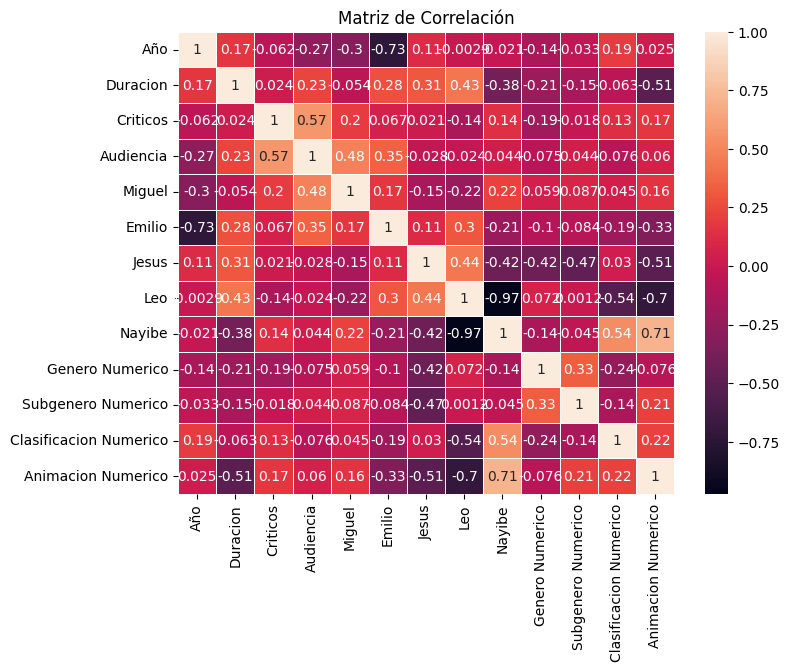

In [ ]:
correlation_matrix = data.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)

# Ajustar el título
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
X=data [["Jesus"]]
y=data["Animacion Numerico"]
X_train, X_test, y_train, y_test = split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
from sklearn import linear_model
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
y_train_pred=lm.predict(X_train)
print(y_train_pred[0:5])

[-0.03396265  0.23748432 -0.03396265 -0.03396265  0.23748432]


In [ ]:
lm.score(X_train,y_train)

0.28755067079538377

Es super bajo porque estoy haciendo un modelo lineal con variables que no tienen un comportamiento lineal, el random forest

** Random Forest **

In [ ]:
X_train, X_test, y_train, y_test = split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn import linear_model

In [ ]:
variables_independientes = ["Año","Duracion","Criticos","Audiencia","Genero Numerico","Subgenero Numerico","Clasificacion Numerico","Animacion Numerico"]
variable_dependiente = ['Jesus',"Emilio","Leo","Nayibe","Miguel"]
x = data[variables_independientes].values
y = data[variable_dependiente].values
x_train, x_test, y_train, y_test = split(x, y, train_size=0.7, test_size=0.3, random_state= 42)

In [ ]:
model = RandomForestRegressor() #Definimos nuestro modelo a usar
model.fit(x_train,
          y_train) #La segunda entrada es la columna que irá en el eje y

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)
residuos = y_test- y_pred


In [ ]:
r2=r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE= mean_absolute_error(y_test, y_pred)
print(f'El coeficiente de determinación de nuestro modelo tiene un valor de {r2:.3f}')
print(f'El error cuadratico medio de nuestro modelo tiene un valor de {MSE:.3f}')
print(f'La raíz cuadrada del MSE es {MSE**0.5:.3f}')
print(f'El error absoluto medio de nuestro modelo tiene un valor de {MAE:.3f}')

El coeficiente de determinación de nuestro modelo tiene un valor de 0.595
El error cuadratico medio de nuestro modelo tiene un valor de 1.145
La raíz cuadrada del MSE es 1.070
El error absoluto medio de nuestro modelo tiene un valor de 0.766


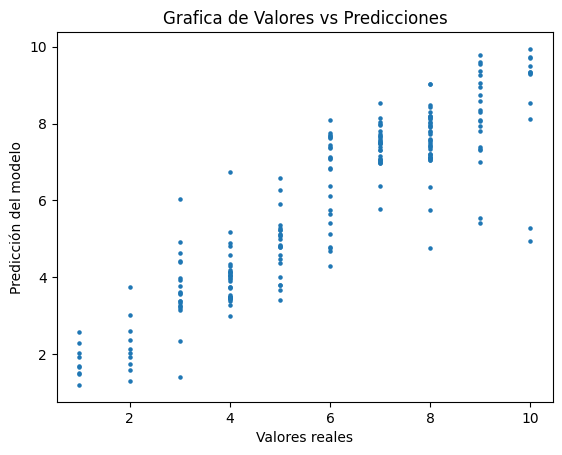

In [ ]:
 plt.scatter(y_test, y_pred,s=5)
 plt.xlabel('Valores reales')
 plt.ylabel('Predicción del modelo')
 plt.title(f'Grafica de Valores vs Predicciones')
 plt.show()

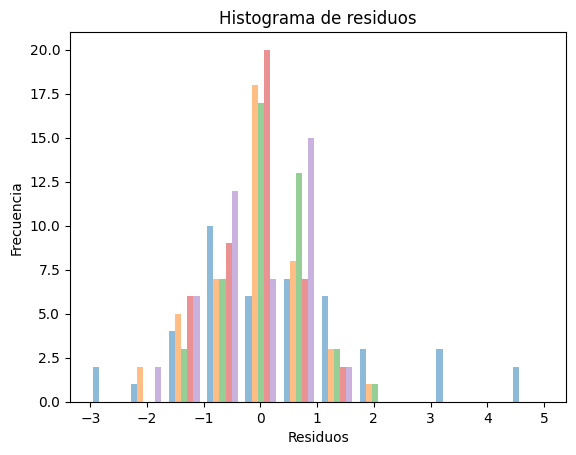

In [ ]:
hist = plt.hist(residuos, bins=12, alpha = 0.5)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

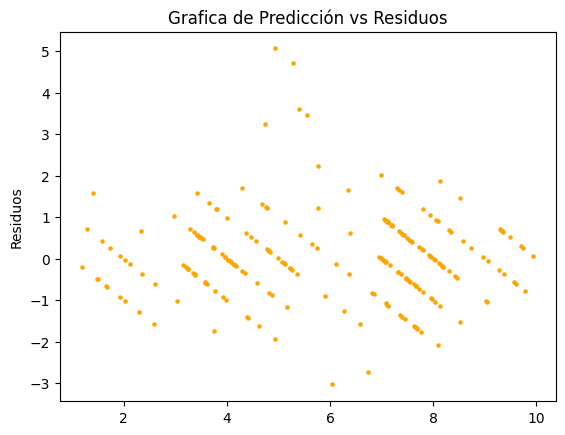

In [ ]:
plt.scatter(y_pred,residuos,s=5, color='orange')
plt.ylabel('Residuos')
plt.title(f'Grafica de Predicción vs Residuos')
plt.show()

In [ ]:
y_pred = model.predict(np.array([2024,120,10,8,0,0,1,1]).reshape(1, -1))
y_pred

array([[5.99, 3.44, 3.7 , 8.25, 6.83]])

Las gráficas proporcionan información valiosa sobre el desempeño de un modelo de regresión lineal para predecir calificaciones de películas en función de varias variables. Al observar la gráfica, "Predicción vs Residuos", se puede notar que los residuos están distribuidos en bandas horizontales. Esto sugiere que las relaciones entre las variables predictoras y la calificación son, en su mayoría, lineales. Sin embargo, la presencia de dichas bandas podría indicar que ciertas variables influyen de manera significativa en los resultados o que el modelo no está capturando completamente ciertas interacciones o patrones más complejos. A pesar de esto, no se observan patrones claros como curvas o embudos, lo cual es una señal positiva que indica una varianza constante en los errores.

En la gráfica, histograma de residuos, se evalúa la distribución de los errores del modelo. Aquí se puede apreciar que los residuos están centrados alrededor de cero y presentan una forma cercana a la de una distribución normal, lo que refuerza que los supuestos básicos del modelo de regresión lineal se cumplen en gran medida. Sin embargo, se observan colas ligeramente anchas, lo que podría ser indicativo de valores atípicos o predicciones menos precisas en algunas áreas específicas del rango de valores.

Finalmente, la gráfica, "Valores Reales vs Predicciones", muestra una correlación positiva entre las calificaciones reales y las predicciones realizadas por el modelo. Esto sugiere que el modelo captura correctamente la tendencia general de los datos. Sin embargo, la dispersión en algunas partes, particularmente en los valores altos de calificación real, evidencia que las predicciones no son perfectas. Esto podría indicar que el modelo no está considerando algunas relaciones importantes o que las variables predictoras no explican completamente la variabilidad en las calificaciones.

Además, al evaluar las métricas de desempeño del modelo, el coeficiente de determinación (R²) tiene un valor de 0.601, lo que indica que el modelo explica aproximadamente el 60.1% de la variabilidad en las calificaciones. Este nivel de ajuste es moderado y sugiere que, aunque el modelo captura patrones importantes, hay un 39.9% de la variabilidad que no está siendo explicada, posiblemente debido a factores no considerados o relaciones no lineales. El error cuadrático medio (MSE) es 1.118, y su raíz cuadrada (RMSE) es 1.057, lo que da una idea del tamaño promedio de los errores de predicción en las mismas unidades que las calificaciones. Finalmente, el error absoluto medio (MAE), con un valor de 0.751, indica que, en promedio, las predicciones del modelo están desviadas de los valores reales por menos de una unidad, lo cual es aceptable pero podría mejorarse.

El modelo tiene un desempeño razonable y cumple con varios supuestos clave de la regresión lineal, como la homocedasticidad y la normalidad de los residuos. Las métricas de desempeño muestran un ajuste moderado, con un R² de 0.601, y errores promedio relativamente bajos (MAE de 0.751). Sin embargo, el modelo aún deja una cantidad considerable de variabilidad sin explicar y podría beneficiarse de ajustes adicionales.







In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/MCD/Equipo2_ModeloRegresion.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/MCD/Equipo2_ModeloRegresion.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 599541 bytes to /content/drive/MyDrive/MCD/Equipo2_ModeloRegresion.html
